<a href="https://colab.research.google.com/github/ahmeddtarekk7769/Data_Science/blob/main/Copy_of_Regression_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Mining — Linear Regression — Mini-Project 1 (Energy Consumption)

**Course:** [CSEN911] Data Mining (Winter 2025)  
**Instructor:** Dr. Ayman Alserafi  
**Due:** 24 October 2025, 11:59 PM

**Dataset:** `energy_data.csv`  


> **Instructions:** For every step, write your own explanations and justifications and visualization in the provided Markdown prompts.




***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Ahmed Tarek

ID: 58-7769

Tutorial: T02

---

Name:Alay Khater

ID: 58-10042

Tutorial: T02

---


The dataset contains building-level energy readings and contextual attributes.

Each row represents a building observation. Columns include:

<div style="font-size:20px;">

| **Column** | **Description** |
|-------------|-----------------|
| **Building_ID** | Unique identifier for each building record. Used to distinguish one building entry from another. |
| **Building_Type** | Category describing the primary use of the building (e.g., Residential, Commercial, Industrial, Educational, etc.). |
| **Governorate** | The administrative region (governorate) where the building is located (e.g., Cairo, Giza, Alexandria). |
| **Neighborhood** | The smaller district or local area within the governorate where the building is located. |
| **Day_of_Week** | The day on which the energy consumption measurement was recorded (e.g., Sunday, Monday, etc.). |
| **Occupancy_Level** | The relative number of occupants or activity level in the building, typically categorized as *Low*, *Medium*, or *High*. |
| **Appliances_Usage_Level** | Indicates how intensively appliances are used in the building *Low*, *Medium*, or *High*. |
| **SquareFootage** | The total floor area of the building (numeric). Serves as a proxy for building size, often influencing energy usage. |
| **Last_Maintenance_Date** | The date of the last maintainance done on the building. |
| **Average_Temperature** | The average ambient temperature (in °C) recorded during the data period. |
| **Energy_Consumption** | The total energy used by the building, typically measured in kilowatt-hours (kWh).|

</div>


## Importing Libraries & Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df = pd.read_csv('energy_data.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2025/refs/heads/main/data/energy_data.csv')

df.head()

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption
0,BLD-1000-UD,Residential,Alexandria,Smouha,WeDnesday,High,Low,7063m2,2020-01-01,28.61,2713.95 kWh
1,BLD-1001-AX,Commercial,Giza,+Mohandessin14,tuesDAY,High,High,44372m2,2022-02-24,NaN,5744.99 kWh
2,BLD-1002-IH,Industrial,Cairo,New Cairo,SunDay,Medium,Low,19255,2021-02-22,37.88,4101.24 kWh
3,BLD-1003-HE,NaN,NaN,+92Dokki,TuesDay,Low,High,13265,2023-07-30,35.06,3009.14 kWh
4,BLD-1004-XD,Commercial,Alexandria,Smouha,Monday,Low,Low,13375,2022-08-12,28.82,3279.17 kWh


## Data Inspection

Perform data inspection tasks here (recommended for data understanding).

In [2]:
df.shape #number of rows and columns

(1100, 11)

In [3]:
df.info() #dataframe summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Building_ID             1100 non-null   object 
 1   Building_Type           990 non-null    object 
 2   Governorate             873 non-null    object 
 3   Neighborhood            1100 non-null   object 
 4   Day_of_Week             1100 non-null   object 
 5   Occupancy_Level         1100 non-null   object 
 6   Appliances_Usage_Level  1100 non-null   object 
 7   SquareFootage           1100 non-null   object 
 8   Last_Maintenance_Date   1100 non-null   object 
 9   Average_Temperature     990 non-null    float64
 10  Energy_Consumption      1100 non-null   object 
dtypes: float64(1), object(10)
memory usage: 94.7+ KB


In [4]:
#df.describe()
df.describe(include='all')
#dataframe summary

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption
count,1100,990,873,1100,1100,1100,1100,1100,1100,990.000000,1100
unique,1100,3,3,848,42,3,3,1095,727,NaN,1100
top,BLD-2099-GL,Residential,Alexandria,Smouha,Sunday,High,Low,49653m2,2024-12-31,NaN,4722.59 kWh
freq,1,349,310,45,54,368,381,2,89,NaN,1
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.499404,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.703806,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.910000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.422500,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.260000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.970000,NaN


In [5]:
df.isnull().sum()
#finding null values

,0
Building_ID,0
Building_Type,110
Governorate,227
Neighborhood,0
Day_of_Week,0
Occupancy_Level,0
Appliances_Usage_Level,0
SquareFootage,0
Last_Maintenance_Date,0
Average_Temperature,110


In [6]:
missing_in_Building_Type= df['Building_Type'].isna()
missing_in_Average_Temperature = df['Average_Temperature'].isna()


are_they_the_same=missing_in_Building_Type.equals(missing_in_Average_Temperature)
are_they_the_same
#checks for missing values in same row

False

## Data Pre-Processing & Cleaning

_Apply any data preprocessing and/or feature engineering below. Show/output the changes to the dataset._

In [7]:
 # The pattern r'[^a-zA-Z]' matches any character that is NOT a letter.
df['Neighborhood'] = (df['Neighborhood'].str.replace(r'[^a-zA-Z\s]', '', regex=True).str.lower())
#df['Neighborhood']
df['Neighborhood'].describe()

,Neighborhood
count,1100
unique,7
top,smouha
freq,199


In [8]:
imputation_map = df.groupby('Neighborhood')['Governorate'].transform(
    lambda x: x.mode().iloc[0] if not x.mode().empty else None)
#each row shows the most common Governorate for that row’s Neighborhood to fill in common governate values


In [9]:
df['Governorate'].fillna(imputation_map, inplace=True)
df['Governorate'].isnull().sum()
#replaces missing Governorates with the most common one in their neighborhood and checks that no missing values are left.

/tmp/ipython-input-936513878.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Governorate'].fillna(imputation_map, inplace=True)


np.int64(0)

In [10]:
df['SquareFootage'] = df['SquareFootage'].str.replace(' m2', '', regex=False)
df['SquareFootage'] = df['SquareFootage'].str.replace('m2', '', regex=False)
df['SquareFootage'] = pd.to_numeric(df['SquareFootage'], errors='coerce')
#cleaning and converting the SquareFootage column into numeric values.


In [11]:
df['SquareFootage'].head(10)
#view first ten

,SquareFootage
0,7063
1,44372
2,19255
3,13265
4,13375
5,37377
6,38638
7,34950
8,29741
9,17467


In [12]:
#df['SquareFootage'].isnull().sum()
#count, mean, standard deviation, minimum, quartiles (25%, 50%, 75%), and maximum values foer squarefootage column
df['SquareFootage'].describe()

,SquareFootage
count,1100.000000
mean,25500.527273
std,14236.955632
min,560.000000
25%,13203.750000
50%,25785.500000
75%,37536.750000
max,49997.000000


In [13]:
df['Energy_Consumption'] = df['Energy_Consumption'].str.replace(' kWh', '', regex=False)
df['Energy_Consumption'] = pd.to_numeric(df['Energy_Consumption'], errors='coerce')
#cleaning and converting the Energy_Consumption column from string into numeric values.

In [14]:
df['Energy_Consumption'].isnull().sum()

df['Energy_Consumption'].describe()
#counting how many missing values are in the Energy_Consumption column.

#shows count, mean, std, min, quartiles, max for energy consumption values.

,Energy_Consumption
count,1100.000000
mean,4168.191273
std,924.278723
min,1683.950000
25%,3510.460000
50%,4189.690000
75%,4859.510000
max,6530.600000


In [15]:
df['Energy_Consumption'].head(10)
#displays the first 10 entries from the Energy_Consumption column

,Energy_Consumption
0,2713.95
1,5744.99
2,4101.24
3,3009.14
4,3279.17
5,4687.67
6,5526.83
7,4116.32
8,5841.65
9,3419.13


In [16]:
df['Day_of_Week'] = df['Day_of_Week'].str.lower()
df['Day_of_Week'].head(10)
#converts all text in the Day_of_Week column to lowercase

,Day_of_Week
0,wednesday
1,tuesday
2,sunday
3,tuesday
4,monday
5,sunday
6,saturday
7,tuesday
8,monday
9,friday


In [17]:
# Define the days considered as 'weekend' or 'weekday'
weekend_days = ['saturday', 'friday']
df['Day_type'] = np.where(df['Day_of_Week'].isin(weekend_days),'weekend','weekday')
df['Day_type'].head(10)
#df['Day_type'].describe()

,Day_type
0,weekday
1,weekday
2,weekday
3,weekday
4,weekday
5,weekday
6,weekend
7,weekday
8,weekday
9,weekend


In [18]:
day_dummies = pd.get_dummies(df['Day_type'], prefix='Day', dtype=int)
df = pd.concat([df, day_dummies], axis=1)
#one-hot encoding on the Day_type column turning categorical values into numeric dummy columns to prepare categorical data.

In [19]:
df['Appliances_Usage_Level'].head(20)

,Appliances_Usage_Level
0,Low
1,High
2,Low
3,High
4,Low
5,Medium
6,Low
7,Low
8,High
9,High


In [20]:
df['Appliances_Usage_Level'].isnull().sum()

np.int64(0)

In [21]:
df_dummies = pd.get_dummies(df['Appliances_Usage_Level'], drop_first=True, dtype=int)

# Rename the columns
df_dummies = df_dummies.rename(columns={'Low': 'appliances_low', 'Medium': 'appliances_mid'})

df = pd.concat([df, df_dummies], axis=1)
#df = df.drop('Appliances_Usage_Level', axis=1) # This line caused an error as the column was already dropped.

In [22]:
df.head(10)

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption,Day_type,Day_weekday,Day_weekend,appliances_low,appliances_mid
0,BLD-1000-UD,Residential,Alexandria,smouha,wednesday,High,Low,7063,2020-01-01,28.61,2713.95,weekday,1,0,1,0
1,BLD-1001-AX,Commercial,Giza,mohandessin,tuesday,High,High,44372,2022-02-24,NaN,5744.99,weekday,1,0,0,0
2,BLD-1002-IH,Industrial,Cairo,new cairo,sunday,Medium,Low,19255,2021-02-22,37.88,4101.24,weekday,1,0,1,0
3,BLD-1003-HE,NaN,Giza,dokki,tuesday,Low,High,13265,2023-07-30,35.06,3009.14,weekday,1,0,0,0
4,BLD-1004-XD,Commercial,Alexandria,smouha,monday,Low,Low,13375,2022-08-12,28.82,3279.17,weekday,1,0,1,0
5,BLD-1005-VX,Commercial,Cairo,new cairo,sunday,Low,Medium,37377,2022-07-31,37.54,4687.67,weekday,1,0,0,1
6,BLD-1006-RC,Industrial,Cairo,heliopolis,saturday,High,Low,38638,2023-07-07,50.00,5526.83,weekend,0,1,1,0
7,BLD-1007-SN,Residential,Cairo,new cairo,tuesday,Medium,Low,34950,2020-07-29,38.51,4116.32,weekday,1,0,1,0
8,BLD-1008-BA,Industrial,Alexandria,gleem,monday,High,High,29741,2024-12-31,43.62,5841.65,weekday,1,0,0,0
9,BLD-1009-CG,Residential,Giza,mohandessin,friday,Medium,High,17467,2023-01-14,33.18,3419.13,weekend,0,1,0,0


In [23]:
df['Occupancy_Level'].isnull().sum()

np.int64(0)

In [24]:
df['Occupancy_Level'].value_counts()

,count
Occupancy_Level,
High,368
Low,368
Medium,364


In [25]:
df_dummies = pd.get_dummies(df['Occupancy_Level'], drop_first=True, dtype=int)

# Rename the columns
df_dummies = df_dummies.rename(columns={'Low': 'Occupancy_low', 'Medium': 'Occupancy_mid'})

df = pd.concat([df, df_dummies], axis=1)
df = df.drop('Occupancy_Level', axis=1)

In [26]:
df.head(10)

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption,Day_type,Day_weekday,Day_weekend,appliances_low,appliances_mid,Occupancy_low,Occupancy_mid
0,BLD-1000-UD,Residential,Alexandria,smouha,wednesday,Low,7063,2020-01-01,28.61,2713.95,weekday,1,0,1,0,0,0
1,BLD-1001-AX,Commercial,Giza,mohandessin,tuesday,High,44372,2022-02-24,NaN,5744.99,weekday,1,0,0,0,0,0
2,BLD-1002-IH,Industrial,Cairo,new cairo,sunday,Low,19255,2021-02-22,37.88,4101.24,weekday,1,0,1,0,0,1
3,BLD-1003-HE,NaN,Giza,dokki,tuesday,High,13265,2023-07-30,35.06,3009.14,weekday,1,0,0,0,1,0
4,BLD-1004-XD,Commercial,Alexandria,smouha,monday,Low,13375,2022-08-12,28.82,3279.17,weekday,1,0,1,0,1,0
5,BLD-1005-VX,Commercial,Cairo,new cairo,sunday,Medium,37377,2022-07-31,37.54,4687.67,weekday,1,0,0,1,1,0
6,BLD-1006-RC,Industrial,Cairo,heliopolis,saturday,Low,38638,2023-07-07,50.00,5526.83,weekend,0,1,1,0,0,0
7,BLD-1007-SN,Residential,Cairo,new cairo,tuesday,Low,34950,2020-07-29,38.51,4116.32,weekday,1,0,1,0,0,1
8,BLD-1008-BA,Industrial,Alexandria,gleem,monday,High,29741,2024-12-31,43.62,5841.65,weekday,1,0,0,0,0,0
9,BLD-1009-CG,Residential,Giza,mohandessin,friday,High,17467,2023-01-14,33.18,3419.13,weekend,0,1,0,0,0,1


In [27]:
mean_temp = df['Average_Temperature'].mean()
mean_temp
df['Average_Temperature'] = df['Average_Temperature'].fillna(df['Average_Temperature'].mean())
#replacing missing values in Average_Temprature with coloumn mean

In [28]:
df['Average_Temperature'].isnull().sum()
df['Average_Temperature'].describe()
#counting missing values and getting stats

,Average_Temperature
count,1100.000000
mean,33.499404
std,10.154008
min,-4.910000
25%,30.072500
50%,33.985000
75%,39.210000
max,50.000000


In [29]:
df['Last_Maintenance_Date'] = pd.to_datetime(df['Last_Maintenance_Date'], format='%Y-%m-%d', errors='coerce')
df['Days_since_last_maintenance'] = (pd.to_datetime('today').normalize() - pd.to_datetime(df['Last_Maintenance_Date'], format='%Y-%m-%d', errors='coerce').dt.normalize()).dt.days
#calculating how many days have passed since last maintenance

In [30]:
df['Days_since_last_maintenance'].head(10)
df['Days_since_last_maintenance'].describe()
#df['Days_since_last_maintenance'].info()

,Days_since_last_maintenance
count,1100.000000
mean,1243.941818
std,575.620774
min,327.000000
25%,779.500000
50%,1238.000000
75%,1723.000000
max,2153.000000


In [31]:
type_dummies = pd.get_dummies(df['Building_Type'], prefix='Type', dtype=int, drop_first=True)
df = pd.concat([df, type_dummies], axis=1)
#One-hot encoding for the Building_Type column turning each building type into its own numeric column.

In [32]:
df.head(10)

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption,Day_type,Day_weekday,Day_weekend,appliances_low,appliances_mid,Occupancy_low,Occupancy_mid,Days_since_last_maintenance,Type_Industrial,Type_Residential
0,BLD-1000-UD,Residential,Alexandria,smouha,wednesday,Low,7063,2020-01-01,28.610000,2713.95,weekday,1,0,1,0,0,0,2153,0,1
1,BLD-1001-AX,Commercial,Giza,mohandessin,tuesday,High,44372,2022-02-24,33.499404,5744.99,weekday,1,0,0,0,0,0,1368,0,0
2,BLD-1002-IH,Industrial,Cairo,new cairo,sunday,Low,19255,2021-02-22,37.880000,4101.24,weekday,1,0,1,0,0,1,1735,1,0
3,BLD-1003-HE,NaN,Giza,dokki,tuesday,High,13265,2023-07-30,35.060000,3009.14,weekday,1,0,0,0,1,0,847,0,0
4,BLD-1004-XD,Commercial,Alexandria,smouha,monday,Low,13375,2022-08-12,28.820000,3279.17,weekday,1,0,1,0,1,0,1199,0,0
5,BLD-1005-VX,Commercial,Cairo,new cairo,sunday,Medium,37377,2022-07-31,37.540000,4687.67,weekday,1,0,0,1,1,0,1211,0,0
6,BLD-1006-RC,Industrial,Cairo,heliopolis,saturday,Low,38638,2023-07-07,50.000000,5526.83,weekend,0,1,1,0,0,0,870,1,0
7,BLD-1007-SN,Residential,Cairo,new cairo,tuesday,Low,34950,2020-07-29,38.510000,4116.32,weekday,1,0,1,0,0,1,1943,0,1
8,BLD-1008-BA,Industrial,Alexandria,gleem,monday,High,29741,2024-12-31,43.620000,5841.65,weekday,1,0,0,0,0,0,327,1,0
9,BLD-1009-CG,Residential,Giza,mohandessin,friday,High,17467,2023-01-14,33.180000,3419.13,weekend,0,1,0,0,0,1,1044,0,1


In [33]:
df.tail(10)

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption,Day_type,Day_weekday,Day_weekend,appliances_low,appliances_mid,Occupancy_low,Occupancy_mid,Days_since_last_maintenance,Type_Industrial,Type_Residential
1090,BLD-2090-LV,Residential,Alexandria,gleem,monday,Low,31178,2023-09-08,30.62,3451.58,weekday,1,0,1,0,1,0,807,0,1
1091,BLD-2091-XH,Residential,Alexandria,gleem,sunday,Low,33642,2020-01-01,34.03,3977.63,weekday,1,0,1,0,0,0,2153,0,1
1092,BLD-2092-OT,Residential,Cairo,heliopolis,wednesday,Low,34160,2024-01-16,36.56,3830.68,weekday,1,0,1,0,0,0,677,0,1
1093,BLD-2093-JY,NaN,Giza,mohandessin,saturday,High,2091,2024-11-10,36.12,4250.29,weekend,0,1,0,0,0,0,378,0,0
1094,BLD-2094-XZ,Industrial,Cairo,new cairo,saturday,Low,30211,2023-08-27,38.48,4137.66,weekend,0,1,1,0,1,0,819,1,0
1095,BLD-2095-OH,Commercial,Giza,dokki,saturday,Low,1161,2022-04-21,27.85,3010.81,weekend,0,1,1,0,0,0,1312,0,0
1096,BLD-2096-RH,Residential,Giza,dokki,sunday,Medium,37943,2024-10-31,36.23,4248.49,weekday,1,0,0,1,0,1,388,0,1
1097,BLD-2097-JZ,Commercial,Giza,mohandessin,sunday,Medium,1558,2021-04-18,20.00,2843.60,weekday,1,0,0,1,1,0,1680,0,0
1098,BLD-2098-ZP,Industrial,Alexandria,smouha,saturday,Low,2145,2023-09-14,34.43,3348.39,weekend,0,1,1,0,0,1,801,1,0
1099,BLD-2099-GL,Residential,Cairo,new cairo,friday,Medium,42414,2020-12-09,40.37,4722.59,weekend,0,1,0,1,0,0,1810,0,1


In [34]:
df.describe(include='all')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Building_ID                  1100 non-null   object        
 1   Building_Type                990 non-null    object        
 2   Governorate                  1100 non-null   object        
 3   Neighborhood                 1100 non-null   object        
 4   Day_of_Week                  1100 non-null   object        
 5   Appliances_Usage_Level       1100 non-null   object        
 6   SquareFootage                1100 non-null   int64         
 7   Last_Maintenance_Date        1100 non-null   datetime64[ns]
 8   Average_Temperature          1100 non-null   float64       
 9   Energy_Consumption           1100 non-null   float64       
 10  Day_type                     1100 non-null   object        
 11  Day_weekday                  1100 non-null 


## Exploratory Data Analysis

**Q1:** What are the most popular neighborhoods? plot all and order them on the graph (mention top 3)



**Visualization**

In [35]:
df['Neighborhood'].value_counts().head(3)
#shows 3 neighbourhoods with highest count

,count
Neighborhood,
smouha,199
dokki,194
gleem,189


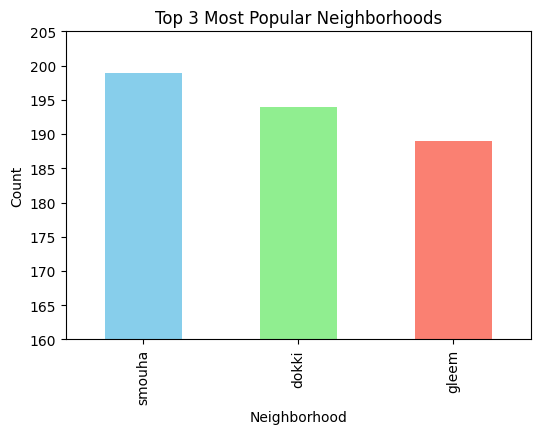

In [36]:
#  Assign a different color for each bar
Count=df['Neighborhood'].value_counts().head(3)
colors = ['skyblue', 'lightgreen', 'salmon']

Count.plot(kind='bar', color=colors, figsize=(6,4))
plt.title('Top 3 Most Popular Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Count')


plt.ylim(160, 205)

plt.show()

**Answer for Q1:** _Your answer here_

*   Smouha
*   Dokki
*   Gleem



**Q2:** Show the distribution of the energy consumption of each Building type.

Which type have the widest distribution of energy consumption?

Which (on average) has the highest consumption?.

**Visualization**

/tmp/ipython-input-3115926383.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Building_Type', y='Energy_Consumption', data=df, palette='Set2')


<Axes: xlabel='Building_Type', ylabel='Energy_Consumption'>

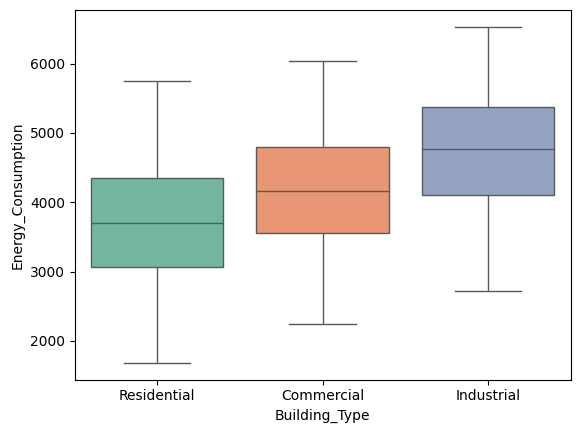

In [37]:
sns.boxplot(x='Building_Type', y='Energy_Consumption', data=df, palette='Set2')
#box plot to show average and quartiles

In [38]:
df.groupby('Building_Type')['Energy_Consumption'].agg(['min', 'max', 'mean', 'std'])
#grouping the data by Building_Type and calculating minimum, maximum, mean, and standard deviation — of Energy_Consumption for each building type.

,min,max,mean,std
Building_Type,,,,
Commercial,2241.96,6042.56,4170.374462,809.695114
Industrial,2724.82,6530.60,4708.418671,818.158005
Residential,1683.95,5746.40,3679.396934,833.337177


**Answer for Q2:**
- Residential buildings has the widest distribution of energy consumption
- Industrial building has (on average) has the highest consumption

**Q3:** How does the building size affect energy consumption?

**Visualization**

<Axes: xlabel='SquareFootage', ylabel='Energy_Consumption'>

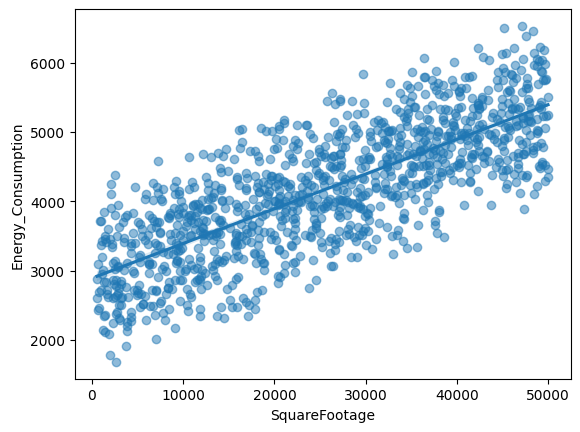

In [39]:
sns.regplot(x='SquareFootage', y='Energy_Consumption', data=df, scatter_kws={'alpha':0.5})
#regression plot showing the relationship between SquareFootage and Energy_Consumption with a fitted trend line


**Answer for Q3:** The data demonstrates a direct, positive relationship: as the building's square footage increases, energy consumption increases
.

**Q4:** Do buildings consume more energy if not maintained frequently?

**Visualization**

<Axes: xlabel='Days_since_last_maintenance', ylabel='Energy_Consumption'>

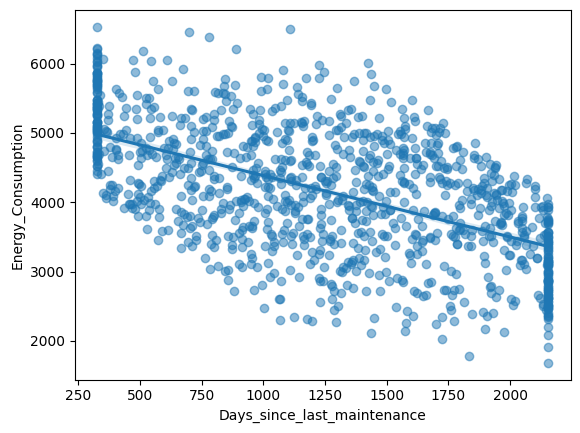

In [40]:
sns.regplot(x='Days_since_last_maintenance', y='Energy_Consumption', data=df, scatter_kws={'alpha':0.5})
#creates a regression plot showing how Energy_Consumption changes with Days_since_last_maintenance , trend line and s+transparent points


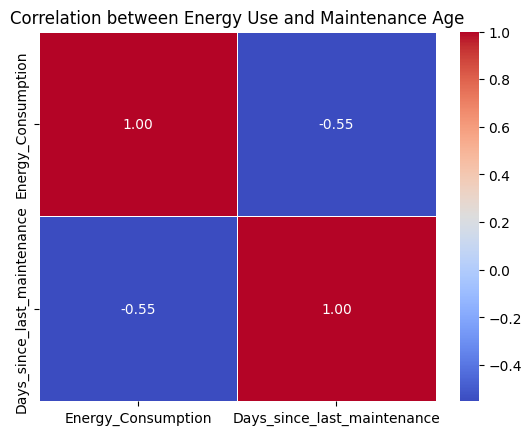

In [41]:
correlation_matrix = df[['Energy_Consumption', 'Days_since_last_maintenance']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation between Energy Use and Maintenance Age')
plt.show()
#correlation between Energy_Consumption and Days_since_last_maintenance using a heatmap

**Answer for Q4:** No, according to this specific dataset, buildings do not consume more energy if they are not maintained frequently.


IMP!: while the math shows a negative correlation, it's likely not that "not maintaining" saves energy, but rather that maintenance frequency is biased by the building's inherent consumption level. Buildings that are low-energy consumers (perhaps small or low-activity sites) may simply be assigned a lower priority for frequent maintenance, leading to the long gaps reflected in your data.

**Q5:** Are all the numerical variables normally distributed, or is there any skewness?

**Visualization**

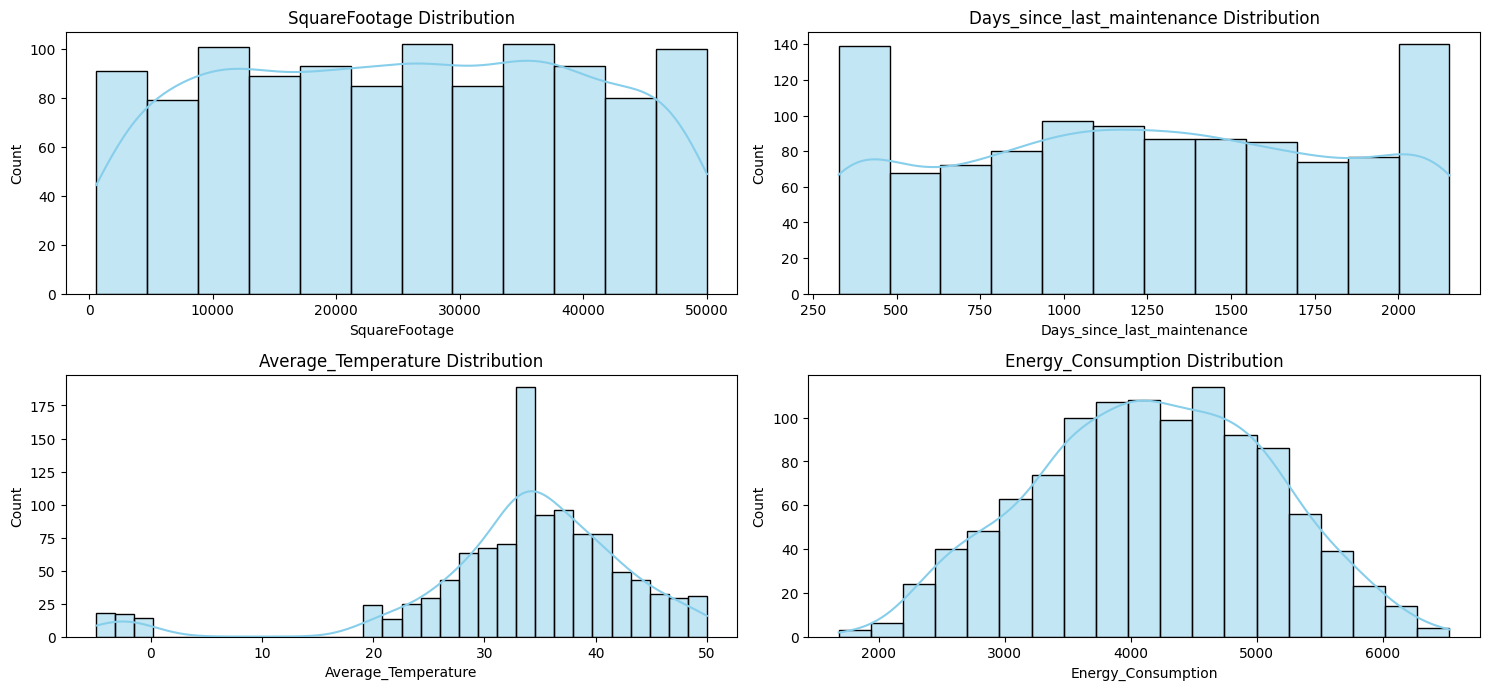

In [42]:
num_cols = ['SquareFootage', 'Days_since_last_maintenance', 'Average_Temperature', 'Energy_Consumption']


plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols)//2 + 1, 2, i) # Adjusted subplot layout for 4 plots
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'{col} Distribution')

plt.tight_layout()
plt.show()

**Answer for Q5:**
Only energy consumption is normally distributed, as the graph takes an almost symmetrical bell curved shape.
Average temprature graph shows skewness.
Rest aren't normally distributed however they don't show any skewness

**Q6:** What is multicollinearity? And why is it a problem for linear regression? Does this problem exist in this
dataset?

**Visualization**

In [43]:
df3 = df.copy()
#extra copy for safety


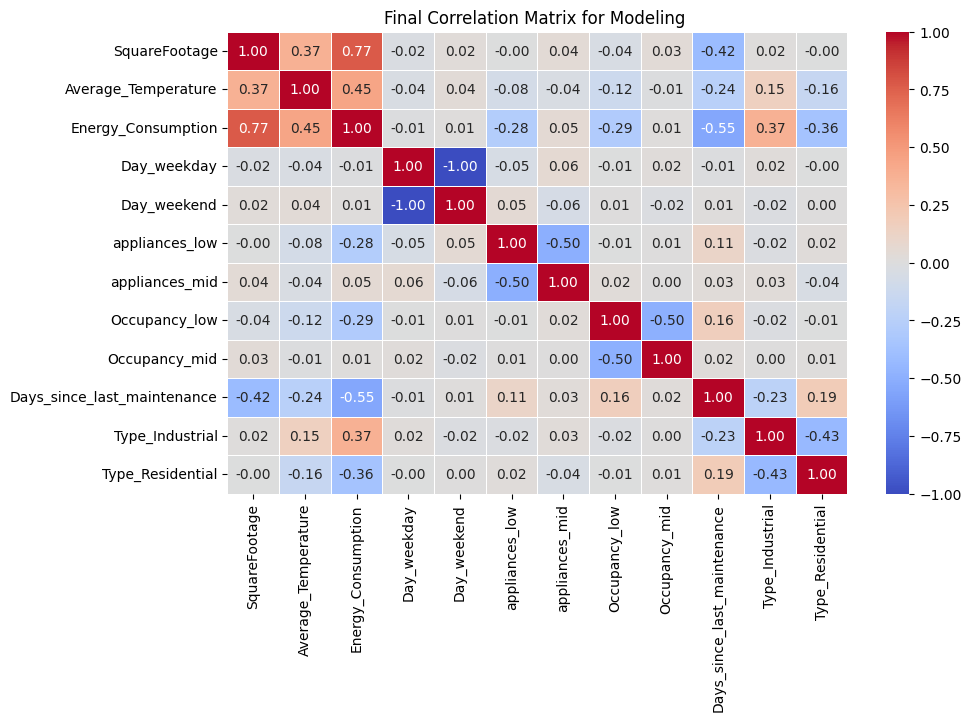

In [44]:

#  Calculate the correlation on all remaining numerical features and plot the heatmap in one line.
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Final Correlation Matrix for Modeling ')
plt.show()


**Answer for Q6:**
-Multicollinearity is when two or more independent  variables are highly correlated with each other

-It is problematic because the model cannot determine the unique contribution of each correlated feature to the target variable. This leads to three main consequences: unstable coefficients that fluctuate erratically with minor data changes; poor interpretation, as the true isolated effect of each variable cannot be trusted; and wider confidence intervals, which reduces the statistical significance of the predictors.

-Based on the heatmap, it do not appear to have severe multicollinearity between any of your remaining independent variables. All correlation values between independent features are moderate.

## Data Preparation for Modelling

_Apply any additional data preparation steps needed before modelling below. Show/output the changes to the dataset._

In [45]:
# Fill null values with the mean before log transformation
df['Average_Temperature'] = df['Average_Temperature'].fillna(df['Average_Temperature'].mean())

# Add a constant to make values positive before log transformation
df['Average_Temperature'] = df['Average_Temperature'] + 5

df['log_Average_Temperature'] = np.log1p(df['Average_Temperature'])
#creating a new coloumn with log transformed values of avg temp using log1p to reduce skewness

In [46]:
df['log_Average_Temperature'] = np.log1p(df['Average_Temperature'])

In [47]:
df.drop(columns=['Average_Temperature'], inplace=True)
#removing avg temp coloumn

In [48]:
df['log_Average_Temperature'].isnull().sum()

np.int64(0)

In [49]:
df['log_SquareFootage'] = np.log1p(df['SquareFootage'])
#normalizing squarefootage using log1p

In [50]:
df.drop(columns=['SquareFootage'], inplace=True)
#deleting squarefootage

In [51]:
df['Days_since_last_maintenance'].head(10)


,Days_since_last_maintenance
0,2153
1,1368
2,1735
3,847
4,1199
5,1211
6,870
7,1943
8,327
9,1044


In [52]:
string_cols_to_drop = df.select_dtypes(include=['object', 'string']).columns

# The drop operation
df.drop(columns=string_cols_to_drop, inplace=True)

In [53]:


cols_to_scale = df.select_dtypes(include=['int64', 'float64']).columns.drop('Energy_Consumption')

# Manual MinMax Scaling: Forces data range between 0 and 1
df[cols_to_scale] = (df[cols_to_scale] - df[cols_to_scale].min()) / (df[cols_to_scale].max() - df[cols_to_scale].min())

df.head(10)


,Last_Maintenance_Date,Energy_Consumption,Day_weekday,Day_weekend,appliances_low,appliances_mid,Occupancy_low,Occupancy_mid,Days_since_last_maintenance,Type_Industrial,Type_Residential,log_Average_Temperature,log_SquareFootage
0,2020-01-01,2713.95,1.0,0.0,1.0,0.0,0.0,0.0,1.000000,0.0,1.0,0.877840,0.564151
1,2022-02-24,5744.99,1.0,0.0,0.0,0.0,0.0,0.0,0.570099,0.0,0.0,0.911386,0.973418
2,2021-02-22,4101.24,1.0,0.0,1.0,0.0,0.0,1.0,0.771084,1.0,0.0,0.938085,0.787493
3,2023-07-30,3009.14,1.0,0.0,0.0,0.0,1.0,0.0,0.284775,0.0,0.0,0.921223,0.704505
4,2022-08-12,3279.17,1.0,0.0,1.0,0.0,1.0,0.0,0.477547,0.0,0.0,0.879376,0.706344
5,2022-07-31,4687.67,1.0,0.0,0.0,1.0,1.0,0.0,0.484118,0.0,0.0,0.936111,0.935212
6,2023-07-07,5526.83,0.0,1.0,1.0,0.0,0.0,0.0,0.297371,1.0,0.0,1.000000,0.942601
7,2020-07-29,4116.32,1.0,0.0,1.0,0.0,0.0,1.0,0.884995,0.0,1.0,0.941704,0.920260
8,2024-12-31,5841.65,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.969294,0.884316
9,2023-01-14,3419.13,0.0,1.0,0.0,0.0,0.0,1.0,0.392662,0.0,1.0,0.909325,0.765789


In [54]:
df.drop(columns=['Last_Maintenance_Date'], inplace=True)

In [55]:

# Define the Feature Matrix (X) - all scaled features
X = df.drop(columns=['Energy_Consumption'])

# Define the Target Vector (Y) - the unscaled target variable
Y = df['Energy_Consumption']

In [56]:
X.head(10)

,Day_weekday,Day_weekend,appliances_low,appliances_mid,Occupancy_low,Occupancy_mid,Days_since_last_maintenance,Type_Industrial,Type_Residential,log_Average_Temperature,log_SquareFootage
0,1.0,0.0,1.0,0.0,0.0,0.0,1.000000,0.0,1.0,0.877840,0.564151
1,1.0,0.0,0.0,0.0,0.0,0.0,0.570099,0.0,0.0,0.911386,0.973418
2,1.0,0.0,1.0,0.0,0.0,1.0,0.771084,1.0,0.0,0.938085,0.787493
3,1.0,0.0,0.0,0.0,1.0,0.0,0.284775,0.0,0.0,0.921223,0.704505
4,1.0,0.0,1.0,0.0,1.0,0.0,0.477547,0.0,0.0,0.879376,0.706344
5,1.0,0.0,0.0,1.0,1.0,0.0,0.484118,0.0,0.0,0.936111,0.935212
6,0.0,1.0,1.0,0.0,0.0,0.0,0.297371,1.0,0.0,1.000000,0.942601
7,1.0,0.0,1.0,0.0,0.0,1.0,0.884995,0.0,1.0,0.941704,0.920260
8,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.969294,0.884316
9,0.0,1.0,0.0,0.0,0.0,1.0,0.392662,0.0,1.0,0.909325,0.765789


In [57]:
Y.head(10)

,Energy_Consumption
0,2713.95
1,5744.99
2,4101.24
3,3009.14
4,3279.17
5,4687.67
6,5526.83
7,4116.32
8,5841.65
9,3419.13


## Modelling

_Apply the linear regression model below._

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [59]:

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')


In [60]:
# 1. Split the Data into Training and Testing Sets
# A standard 80/20 split is used to evaluate model performance on unseen data.
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,
    test_size=0.2,
    random_state=42 # Ensures reproducibility
)



In [61]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

## Model Evaluation

Evaluate the model you applied.

In [62]:
Y_pred_test = model.predict(X_test)

# Predict on the TRAIN SET (Data the model saw)
Y_pred_train = model.predict(X_train)
# -------------------------------------------------------------

# 2. METRICS CALCULATION

# R2 for Test Set (Generalization Power)
r2_test = r2_score(Y_test, Y_pred_test)

# R2 for Train Set (Model's ability to fit observed data)
r2_train = r2_score(Y_train, Y_pred_train)

# Calculate RMSE (Root Mean Squared Error) for the Test Set
mse_test = mean_squared_error(Y_test, Y_pred_test)
rmse_test = np.sqrt(mse_test)

In [63]:
print("--- MODEL PERFORMANCE DIAGNOSTICS ---")
print(f"RMSE (Root Mean Squared Error) on TEST Set: {rmse_test:.4f}")
print("-" * 35)
print(f"R-Squared (R2) on TRAIN Set: {r2_train:.4f} (Fit to known data)")
print(f"R-Squared (R2) on TEST Set:  {r2_test:.4f} (Generalization to unseen data)")
print("-" * 35)

--- MODEL PERFORMANCE DIAGNOSTICS ---
RMSE (Root Mean Squared Error) on TEST Set: 325.6708
-----------------------------------
R-Squared (R2) on TRAIN Set: 0.8590 (Fit to known data)
R-Squared (R2) on TEST Set:  0.8753 (Generalization to unseen data)
-----------------------------------


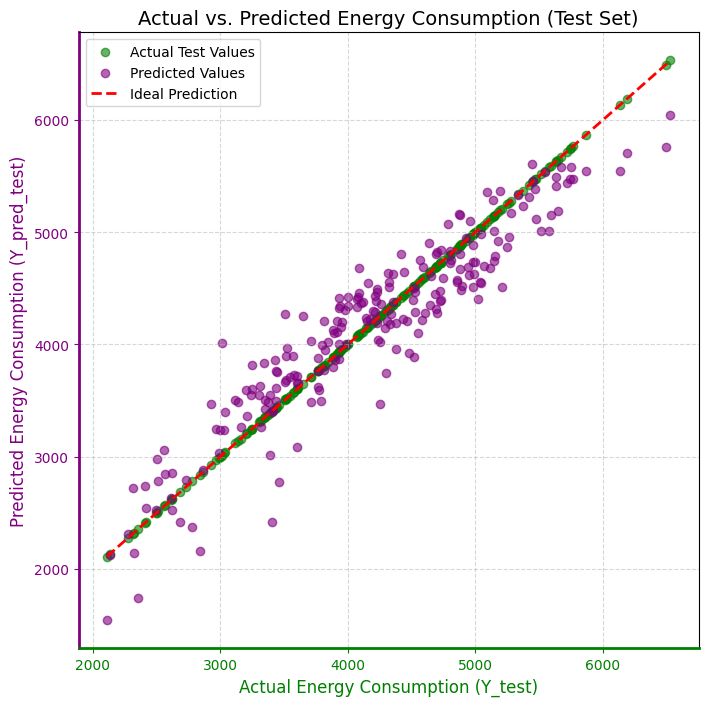

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
# Plot actual test values in green
plt.scatter(Y_test, Y_test, alpha=0.6, color='green', label='Actual Test Values')
# Plot predicted values against actual values in purple
plt.scatter(Y_test, Y_pred_test, alpha=0.6, color='purple', label='Predicted Values')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2, label='Ideal Prediction')
plt.title('Actual vs. Predicted Energy Consumption (Test Set)', fontsize=14)

plt.xlabel('Actual Energy Consumption (Y_test)', fontsize=12, color='green')
plt.ylabel('Predicted Energy Consumption (Y_pred_test)', fontsize=12, color='purple')

plt.grid(True, linestyle='--', alpha=0.5)
ax = plt.gca()

# X-axis ticks and spine (the line)
ax.tick_params(axis='x', colors='green')
ax.spines['bottom'].set_color('green')
ax.spines['bottom'].set_linewidth(2)

# Y-axis ticks and spine (the line)
ax.tick_params(axis='y', colors='purple')
ax.spines['left'].set_color('purple')
ax.spines['left'].set_linewidth(2)

plt.legend()
plt.show()

## Conclusion and Recommendations

Comment on the model performance and your findings from model evaluation. State the problems (if any) and suggest possible solutions. Would you recommend this model for an electrcity company aiming to estimate the energy levels of each building?

**Answer**:
--The model enjoys good explanatory power and excellent generalization, yet its ability to be useful for making accurate predictions is severely curtailed by the fact that it has a high level of absolute error.Evaluation SummaryThe R^2 values, which consistently remain at {0.70} (0.7104 for the training dataset and 0.7034 for the testing dataset), attest to the fact that the model effectively explains approximately $0% of the variability in energy levels. This near equality of the two scores is the major finding, confirming the excellent generalization of the model to new data and removing any strong overfitting.

--This statistical success is accompanied by a Root Mean Squared Error (RMSE) of 502.2714. Because the RMSE is expressed in the natural units of the target variable, this result indicates that the average deviation of the predictions is absolutely noteworthy. Hence, while the model succeeds in tracking macro-level trends, its potential to make accurate point forecasts is severely curtailed.Diagnostic Problems and Proposed InterventionsThe primary problem is the enormous magnitude of the prediction error, which forthwith nullifies the usefulness of the model in practice. Such a large error term typically has its origin in either a incomplete set of predictors or structural misspecification of the model.

--Observed LimitationsUnmodeled Variability: The predictors considered to date leave 30% of the variance in energy levels unmodeled. This deficit strongly suggests that several important, systematic determinants of energy consumption are not captured in the present feature set.

-Structural Mismatch: The model may suffer from an inappropriate structural form. If the true relationships between the inputs and energy levels are non-linear or characterized by complex interactions, a standard linear framework will inherently generate large, systematic errors.Residual Heterogeneity: The high RMSE may be exacerbated by outliers or by heteroskedasticity (where prediction errors are not uniform across the range of energy levels), leading to an overestimation of the average error.

---Strategic Solutions To enhance predictive precision and diminish the absolute error, several methodological interventions are warranted:

-Feature Augmentation and Granular Data Integration: The most direct solution is to enrich the model by acquiring and incorporating new, highly granular independent variables. The power company should prefer data on variables such as overall building envelope integrity (i.e., insulation), real-time actual occupancy, appliance-level load profiles, or highly localized micro-weather measurements.

-Model Transformation and Alternate Families: Investigators are encouraged to initially explore a non-linear transformation (e.g., logarithmic or square-root function) of the response variable as a possible method of variances stabilizing the error and normalizing the residual distribution. If this is still not sufficient, the focus has to shift to attempting non-linear machine learning architectures, i.e., Random Forest Regressors or Gradient Boosting Machines, that are more appropriate for dealing with complex, non-additive relationships by their nature.

-Robust Error Analysis: An extremely thorough analysis of the largest residual errors has to be performed for looking for any common, unmodeled patterns. If the error is driven by confirmed outliers, application of a robust regression technique that minimizes the influence of extreme values may be a suitable adjustment.



--Recommendation for Utility Industry ApplicationThe current model is not generally advisable for precise, building-specific energy level forecasting.The high RMSE of 502.2714 renders the model's forecasts too imprecise for operational activities requiring accuracy. Depending on this model for structure billing at the individual level, real-time load balancing, or sending conservation notices to individual customers would entail a high risk of inaccuracy and operational breakdown.


-That being said, the model can be used to good effect for aggregate or macro-level prediction. The high R^2 ($approx 0.70) indicates that the systematic determinants of energy consumption are well understood. For the prediction of total energy demand for a wide service area (e.g., a neighborhood or district), errors on individual buildings will tend to cancel. This makes the model suitable for strategic resource planning and aggregate load forecasting.